# 머신러닝 모델

## 지도학습 - 회귀 모델

### 단순선형회귀분석

- CRIM 변수로 CRIM이 PRICE에 영향을 주는지 확인
    - Boston 주택 가격 데이터 이용

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df['Price'] = pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston_df.shape

(506, 14)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
crim_price = boston_df[['CRIM', 'Price']]
crim_price.head()

,CRIM,Price
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


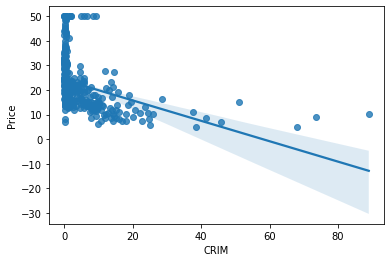

In [12]:
sns.regplot(x = 'CRIM', y = 'Price', data = crim_price)
plt.show()

In [13]:
price = boston_df[['Price']]
crim = boston_df[['CRIM']]

In [14]:
import statsmodels.api as sm

In [15]:
crim1 = sm.add_constant(crim, has_constant = 'add')

In [16]:
reg = sm.OLS(price, crim1)
fitted_model = reg.fit()

In [17]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.17e-19
Time:                        22:06:37   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 아파트 가격(y)의 총 변동성 중 15% 정도를 x(crim)이 설명한다( ==> R-squared = 0.151)

- Y_hat = bata0 + beta1 * X 계산

In [18]:
fitted_model.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [19]:
np.dot(crim1, fitted_model.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [20]:
pred = fitted_model.predict(crim1)

In [21]:
pred

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [22]:
pred-np.dot(crim1, fitted_model.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

- 시각화

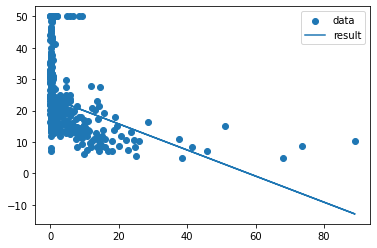

In [23]:
plt.scatter(crim, price, label = 'data')
plt.plot(crim, pred, label = 'result')
plt.legend()
plt.show()

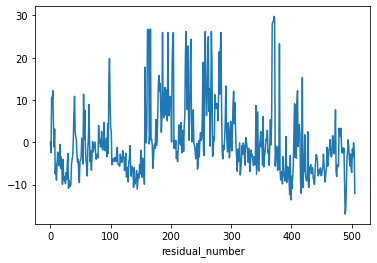

In [24]:
fitted_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

In [25]:
sum(fitted_model.resid)

6.910028105266974e-13

#### 과제 : Boston 주택 가격 데이터 이용 - RM, LSTAT 변수로 각각 단순 선형 회귀 분석 후 결과 분석

In [26]:
price = boston_df[['Price']]
rm = boston_df[['RM']]
lstat = boston_df[['LSTAT']]

In [27]:
rm1 = sm.add_constant(rm, has_constant = 'add')
lstat1 = sm.add_constant(lstat, has_constant = 'add')

In [28]:
model1 = sm.OLS(price, rm1)
model2 = sm.OLS(price, lstat1)
fitted_model1 = model1.fit()
fitted_model2 = model2.fit()

In [29]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.49e-74
Time:                        22:06:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.08e-88
Time:                        22:06:38   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred1 = fitted_model1.predict(rm1)
pred2 = fitted_model2.predict(lstat1)

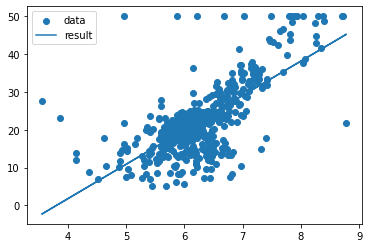

In [32]:
plt.scatter(rm, price, label = 'data')
plt.plot(rm, pred1, label = 'result')
plt.legend()
plt.show()

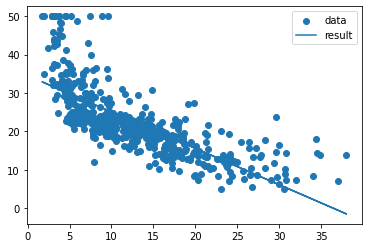

In [33]:
plt.scatter(lstat, price, label = 'data')
plt.plot(lstat, pred2, label = 'result')
plt.legend()
plt.show()

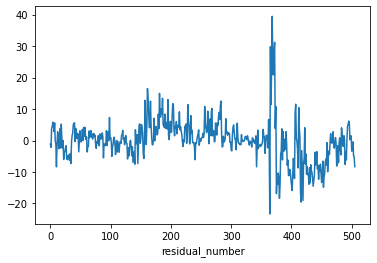

In [34]:
fitted_model1.resid.plot()
plt.xlabel('residual_number')
plt.show()

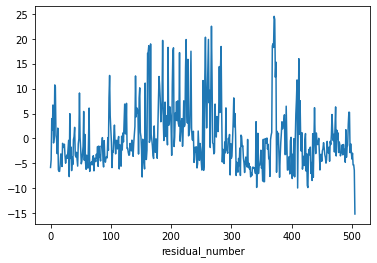

In [35]:
fitted_model2.resid.plot()
plt.xlabel('residual_number')
plt.show()

### 다중선형회귀분석

- Boston 주택 가격 데이터 이용
    - CRIM, RM, LSTAT 변수를 이용해 다중 선형 회귀 분석하기

In [36]:
x_data = boston_df[['CRIM', 'RM', 'LSTAT']]
price = boston_df[['Price']]

In [37]:
x_data1 = sm.add_constant(x_data, has_constant = 'add')

In [38]:
multi_model = sm.OLS(price, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.01e-112
Time:                        22:06:38   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


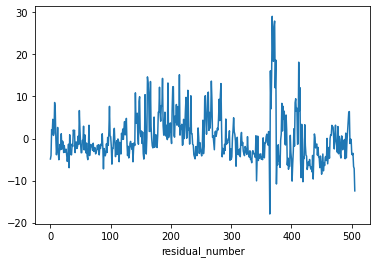

In [40]:
fitted_multi_model.resid.plot() # 잔차 확인하기
plt.xlabel('residual_number')
plt.show()

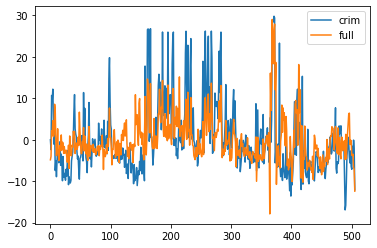

In [41]:
fitted_model.resid.plot(label = 'crim')
fitted_multi_model.resid.plot(label = 'full')
plt.legend()
plt.show()

### 다중공선성 확인(by 상관계수/산점도)

In [42]:
x_data.corr() # 상관계수

,CRIM,RM,LSTAT
CRIM,1.000000,-0.219247,0.455621
RM,-0.219247,1.000000,-0.613808
LSTAT,0.455621,-0.613808,1.000000


In [43]:
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


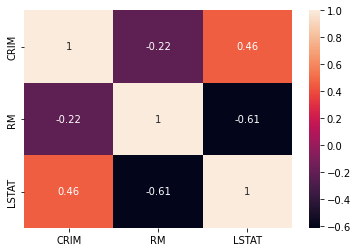

In [44]:
sns.heatmap(x_data.corr(), annot = True)
plt.show()

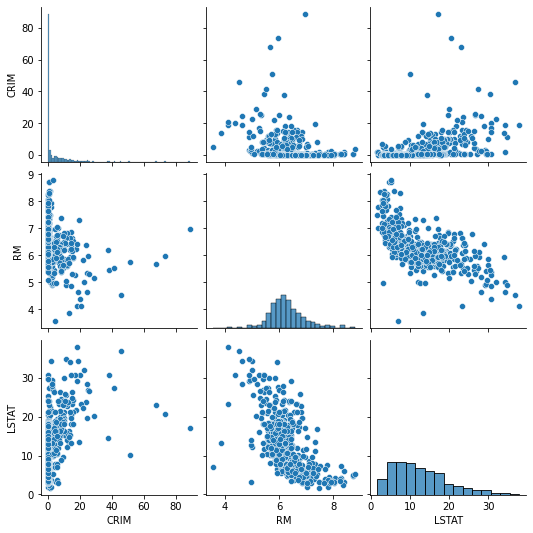

In [45]:
sns.pairplot(x_data)
plt.show()

### VIF를 통한 다중공선성 확인

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif # 10이상인 경우 다중공선성이 있는 변수라고 판단

,VIF Factor,features
0,1.475257,CRIM
1,3.379490,RM
2,4.167763,LSTAT


In [48]:
vif = pd.DataFrame()
x_data2 = x_data.drop('LSTAT', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.151584,CRIM
1,1.151584,RM


In [49]:
x_data3 = sm.add_constant(x_data2, has_constant = 'add')
model_vif = sm.OLS(price, x_data3)
fitted_model_vif = model_vif.fit()

In [50]:
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.22e-86
Time:                        22:06:39   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
RM             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.01e-112
Time:                        22:06:39   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 학습 / 검증데이터 분할

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = x_data
y = price
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   train_size= 0.7, test_size = 0.3,
                                                   random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [54]:
x_train2 = sm.add_constant(x_train, has_constant = 'add')
fit_1 = sm.OLS(y_train, x_train2)
fit_1 = fit_1.fit()

In [55]:
x_test2 = sm.add_constant(x_test, has_constant = 'add')
fit_1.predict(x_test2)

404     5.439925
302    26.379176
465    18.944288
278    27.196242
295    28.757754
         ...    
8       9.191039
459    19.858532
165    23.326341
461    21.778478
476    19.799286
Length: 152, dtype: float64

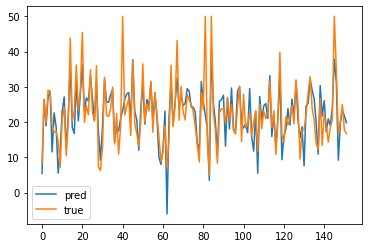

In [56]:
plt.plot(np.array(fit_1.predict(x_test2)), label = 'pred')
plt.plot(np.array(y_test), label = 'true')
plt.legend()
plt.show()

In [57]:
X = x_data2
y = price
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y,
                                                       train_size = 0.7, test_size = 0.3,
                                                       random_state = 102)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(354, 2) (152, 2) (354, 1) (152, 1)


In [58]:
x2_train2 = sm.add_constant(x2_train, has_constant = 'add')
fit_2 = sm.OLS(y2_train, x2_train2)
fit_2 = fit_2.fit()

In [59]:
x2_test2 = sm.add_constant(x2_test, has_constant = 'add')

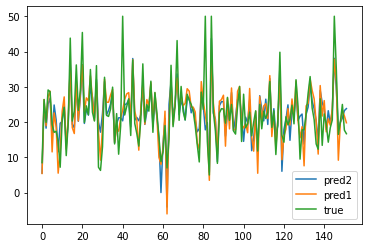

In [60]:
plt.plot(np.array(fit_2.predict(x2_test2)), label = 'pred2')
plt.plot(np.array(fit_1.predict(x_test2)), label = 'pred1')
plt.plot(np.array(y2_test), label = 'true')
plt.legend()
plt.show()

### MSE를 통한 검증데이터에 대한 성능 비교

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_true = y_test['Price'], y_pred = fit_1.predict(x_test2))

28.052043899506305

In [63]:
mean_squared_error(y_true = y2_test['Price'], y_pred = fit_2.predict(x2_test2))

34.729785078939415

### 사이킷런으로 회귀분석

In [64]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
X = boston_df[['CRIM', 'RM', 'LSTAT']]
y = boston_df[['Price']]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.7, test_size = 0.3,
                                                   random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [67]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [68]:
y_pred = lr.predict(x_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
mse

28.05204389950629

In [70]:
r2 = r2_score(y_test, y_pred)
r2

0.6355016044016516

In [71]:
print('절편(베타0): ' , lr.intercept_)
print('회귀계수 : ', lr.coef_)

절편(베타0):  [-2.1790669]
회귀계수 :  [[-0.11503944  5.19512234 -0.5967032 ]]


In [72]:
coeff = pd.DataFrame(lr.coef_.T, index = X.columns, columns = ['coeff'])
coeff

,coeff
CRIM,-0.115039
RM,5.195122
LSTAT,-0.596703


### 로지스틱 회귀 분석
- 개인 신용도(대출을 해줄 수 있는지 여부 판단)
    - target : Personal loan 
        - 데이터 : Personal Loan.csv

In [95]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [74]:
ploan = pd.read_csv('Personal Loan.csv')
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [75]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [76]:
ploan_processed = ploan.drop(['ID', 'ZIP Code'], axis = 1, inplace = False)
ploan_processed.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [77]:
ploan_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2500 non-null   int64  
 1   Experience          2500 non-null   int64  
 2   Income              2500 non-null   int64  
 3   Family              2500 non-null   int64  
 4   CCAvg               2500 non-null   float64
 5   Education           2500 non-null   int64  
 6   Mortgage            2500 non-null   int64  
 7   Personal Loan       2500 non-null   int64  
 8   Securities Account  2500 non-null   int64  
 9   CD Account          2500 non-null   int64  
 10  Online              2500 non-null   int64  
 11  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 234.5 KB


In [78]:
ploan_processed = sm.add_constant(ploan_processed, has_constant = 'add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [79]:
# 데이터 분리 
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부 label 2개 1 or 0 

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size = 0.7, test_size = 0.3,
                                                   random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [81]:
# 로지스틱 회귀 모형 모델링
model = sm.Logit(y_train, x_train)
results = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.129622
         Iterations 9


In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.6088
Time:                        22:20:34   Log-Likelihood:                -226.84
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                2.891e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0601      0.095      0.630      0.529      -0.127       0.247
CCAvg                  0.1412      0.064      2.196      0.028       0.015       0.267
CD Account             3.8711      0.567      6.827      0.000       2.760       4.982
CreditCard            -1.5362      0.358     -4.293      0.000      -2.238      -0.835
Education              1.8225      0.199      9.143      0.000       1.432       2.213
Experience            -0.0426      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5957      0.123      4.859      0.000       0.355       0.836
Income                 0.0540      0.004     12.292      0.000       0.045       0.063
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5070      0.262     -1.939      0.053      -1.020       0.006
Securities Account    -1.3259      0.524     -2.532      0.011      -2.352      -0.300
const                -14.9293      2.640     -5.656      0.000     -20.103      -9.755
======================================================================================
"""

In [83]:
results.params

Age                    0.060094
CCAvg                  0.141168
CD Account             3.871068
CreditCard            -1.536217
Education              1.822529
Experience            -0.042629
Family                 0.595657
Income                 0.054049
Mortgage              -0.000330
Online                -0.507031
Securities Account    -1.325944
const                -14.929306
dtype: float64

In [85]:
np.exp(results.params)

Age                   1.061936e+00
CCAvg                 1.151619e+00
CD Account            4.799360e+01
CreditCard            2.151937e-01
Education             6.187488e+00
Experience            9.582666e-01
Family                1.814222e+00
Income                1.055537e+00
Mortgage              9.996706e-01
Online                6.022809e-01
Securities Account    2.655522e-01
const                 3.283105e-07
dtype: float64

In [86]:
results.aic

477.6763428710175

In [87]:
y_pred = results.predict(x_test)
y_pred

924     0.009612
2357    0.005326
455     0.014446
387     0.044246
343     0.003249
          ...   
2124    0.000805
2100    0.029638
893     0.000271
1669    0.000125
2218    0.000396
Length: 750, dtype: float64

In [88]:
def Pred(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return (Y.astype(int))

Y_pred = Pred(y_pred, 0.5)
Y_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int64

In [89]:
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[663  11]
 [ 29  47]]


In [90]:
# accuracy 
(cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat)

0.9466666666666667

In [91]:
def acc(cfmat): # accuracy 함수
    acc = (cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat)
    return acc

In [92]:
acc(cfmat)

0.9466666666666667

In [93]:
# 임계값에 따른 성능지표 비교 
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    Y_pred = Pred(y_pred, i)
    cfmat = confusion_matrix(y_test, Y_pred)
    table.loc[i] = acc(cfmat)
    
table.index.name = 'threshold'
table.columns.name = 'preformance'
table

preformance,ACC
threshold,
0.0,0.101333
0.1,0.861333
0.2,0.901333
0.3,0.920000
0.4,0.938667
0.5,0.946667
0.6,0.949333
0.7,0.952000
0.8,0.952000


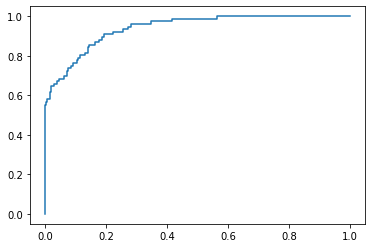

AUC :  0.9393838825550523


In [96]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()
auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

In [99]:
# Expreience, Mortage 변수 제거 

feature_columns2 = list(ploan_processed.columns.difference(['Personal Loan', 
                                                           'Experience',
                                                           'Mortage']))

X2 = ploan_processed[feature_columns2]
y2 = ploan_processed['Personal Loan']

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                       train_size = 0.7, test_size = 0.3,
                                                       random_state = 102)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [100]:
model2 = sm.Logit(y2_train, x2_train)
results2 = model2.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.129678
         Iterations 9


In [101]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1739
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.6086
Time:                        22:32:35   Log-Likelihood:                -226.94
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                3.695e-145
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0177      0.011      1.549      0.121      -0.005       0.040
CCAvg                  0.1425      0.064      2.221      0.026       0.017       0.268
CD Account             3.8589      0.566      6.816      0.000       2.749       4.968
CreditCard            -1.5384      0.358     -4.302      0.000      -2.239      -0.837
Education              1.8356      0.197      9.305      0.000       1.449       2.222
Family                 0.5968      0.122      4.877      0.000       0.357       0.837
Income                 0.0539      0.004     12.296      0.000       0.045       0.062
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5067      0.262     -1.937      0.053      -1.019       0.006
Securities Account    -1.3259      0.524     -2.529      0.011      -2.353      -0.299
const                -13.8752      1.175    -11.807      0.000     -16.178     -11.572
======================================================================================
"""

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.6088
Time:                        22:32:42   Log-Likelihood:                -226.84
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                2.891e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0601      0.095      0.630      0.529      -0.127       0.247
CCAvg                  0.1412      0.064      2.196      0.028       0.015       0.267
CD Account             3.8711      0.567      6.827      0.000       2.760       4.982
CreditCard            -1.5362      0.358     -4.293      0.000      -2.238      -0.835
Education              1.8225      0.199      9.143      0.000       1.432       2.213
Experience            -0.0426      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5957      0.123      4.859      0.000       0.355       0.836
Income                 0.0540      0.004     12.292      0.000       0.045       0.063
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5070      0.262     -1.939      0.053      -1.020       0.006
Securities Account    -1.3259      0.524     -2.532      0.011      -2.352      -0.300
const                -14.9293      2.640     -5.656      0.000     -20.103      -9.755
======================================================================================
"""

In [103]:
y2_pred = results2.predict(x2_test)

In [104]:
Y2_pred = Pred(y2_pred, 0.5)
Y2_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int64

In [105]:
cfmat2 = confusion_matrix(y_test, Y_pred)

In [106]:
print(acc(cfmat2))

0.944


In [107]:
# 임계값에 따른 성능지표 비교 
threshold = np.arange(0, 1, 0.1)
table2 = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    Y2_pred = Pred(y2_pred, i)
    cfmat2 = confusion_matrix(y2_test, Y2_pred)
    table2.loc[i] = acc(cfmat2)
    
table2.index.name = 'threshold'
table2.columns.name = 'preformance'
table2

preformance,ACC
threshold,
0.0,0.101333
0.1,0.862667
0.2,0.905333
0.3,0.920000
0.4,0.940000
0.5,0.946667
0.6,0.949333
0.7,0.953333
0.8,0.953333


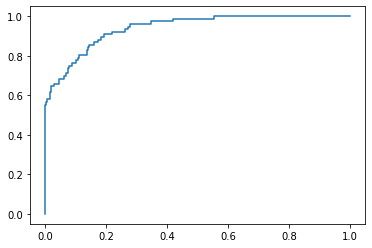

AUC :  0.9395986256442292


In [108]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2_test, y2_pred, pos_label = 1)
plt.plot(fpr2, tpr2)
plt.show()
auc = np.trapz(tpr2, fpr2)
print('AUC : ', auc)

### 회귀 계수 축소법

In [109]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [110]:
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [111]:
print(x_train.shape)

(1750, 12)


#### Lasso

In [112]:
lasso = Lasso(alpha = 0.01) # 람다
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [113]:
lasso.coef_

array([ 4.89681547e-04,  8.00850400e-03,  6.59810232e-02, -0.00000000e+00,
        7.48241892e-02,  8.81624384e-05,  2.64904770e-02,  3.49537610e-03,
        2.59297464e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [114]:
pred_y_lasso = lasso.predict(x_test)
pred_Y_lasso = Pred(pred_y_lasso, 0.5)

In [115]:
cfmat = confusion_matrix(y_test, pred_Y_lasso)
print(acc(cfmat))

0.932


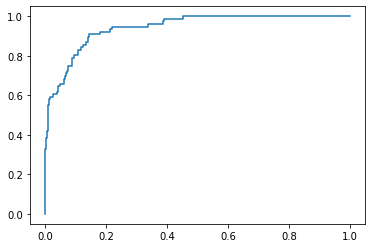

AUC :  0.942468374199594


In [119]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_lasso)
plt.plot(fpr, tpr)
plt.show()
auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

#### Ridge

In [120]:
ridge = Ridge(alpha = 0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [121]:
ridge.coef_

array([-2.33494223e-03,  1.19876825e-02,  3.32565910e-01, -6.22822445e-02,
        8.65336770e-02,  2.89763096e-03,  3.22076910e-02,  3.21925053e-03,
       -7.66125755e-07, -2.51119894e-02, -7.22860187e-02,  0.00000000e+00])

In [122]:
pred_y_ridge = ridge.predict(x_test)
pred_Y_ridge = Pred(pred_y_ridge, 0.5)

In [123]:
cfmat = confusion_matrix(y_test, pred_Y_ridge)
print(acc(cfmat))

0.9453333333333334


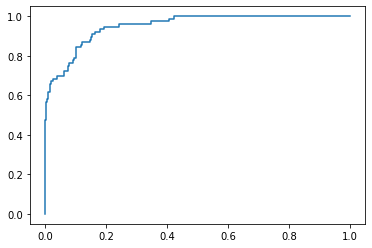

AUC :  0.9502967359050445


In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_ridge)
plt.plot(fpr, tpr)
plt.show()
auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

#### ElasticNet

In [125]:
elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.5) 
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [126]:
elastic.coef_

array([ 2.32835292e-06,  1.03355555e-02,  1.55787081e-01, -1.56235823e-02,
        8.04449114e-02,  5.68583055e-04,  2.94119771e-02,  3.39182663e-03,
        1.58356349e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [127]:
pred_y_elastic = elastic.predict(x_test)
pred_Y_elastic = Pred(pred_y_elastic, 0.5)

In [128]:
cfmat = confusion_matrix(y_test, pred_Y_elastic)
print(acc(cfmat))

0.9413333333333334


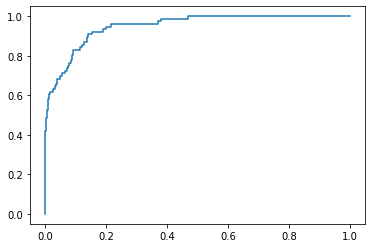

AUC :  0.9491058878650632


In [129]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_elastic)
plt.plot(fpr, tpr)
plt.show()
auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

In [130]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [131]:
data = []
acc_table = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a).fit(x_train, y_train)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    y_pred = lasso.predict(x_test)
    y_pred = Pred(y_pred, 0.5)
    cfmat = confusion_matrix(y_test, y_pred)
    acc_table.append((acc(cfmat)))
    
df_lasso = pd.DataFrame(data, index = alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.372872,-0.405644,-0.148552,-0.117516,0.102857
1,-0.000760,0.000490,0.000000,0.000000,-0.000000
2,0.011615,0.008009,0.000000,0.000000,0.000000
3,0.298692,0.065981,0.000000,0.000000,0.000000
4,-0.053192,-0.000000,-0.000000,-0.000000,-0.000000
5,0.085012,0.074824,0.000000,0.000000,0.000000
6,0.001324,0.000088,0.000000,0.000000,-0.000000
7,0.031592,0.026490,0.000000,0.000000,0.000000
8,0.003255,0.003495,0.003359,0.002956,0.000000
9,0.000002,0.000026,0.000017,0.000000,0.000000


In [132]:
acc_table_lasso = pd.DataFrame(acc_table, index = alpha).T
acc_table_lasso

,0.001,0.010,0.100,1.000,10.000
0,0.944,0.932,0.892,0.898667,0.898667


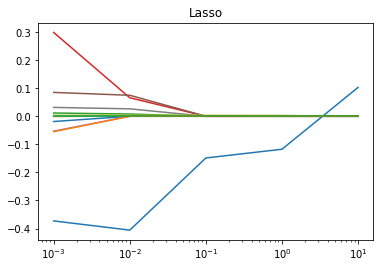

In [133]:
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title('Lasso')
plt.show()